<a href="https://colab.research.google.com/github/nluiscuadros24/predicci-n_de_radiacion-solar/blob/main/predicci%C3%B3n_radiaci%C3%B3n_solar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error, max_error

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
mydata=pd.read_csv('Latacunga_2019-01-01_2019-01-31.csv')


In [ ]:
import datetime

#Date

mydata['Year'] = pd.DatetimeIndex(mydata['Time']).year
mydata['Month'] = pd.DatetimeIndex(mydata['Time']).month
mydata['Day'] = pd.DatetimeIndex(mydata['Time']).day
mydata.head()

#Time 

mydata['Hour'] = pd.DatetimeIndex(mydata['Time']).hour


mydata.tail()




,Time,Temp Avg,Temp Low,Temp High,Heat Index,Wind Chill,Temp (Day) Low,Temp (Day) High,Hum Avg,Hum Low,Hum High,Dew Point,Hum (Day) Low,Hum (Day) High,Baro Avg,Baro Low,Baro High,Baro (Day) Low,Baro (Day) High,Windspeed,Wind Direction,Gust,Gust Direction,Gust (Day) Max,Gust (Day) Direction,Leaf Wetness (Minutes),Leaf Wetness (Day),Solar Radiation Avg,Solar Radiation Sum (Interval),Solar Radiation Sum (Day),Interval Precip,Day Precip,Inside Temp Avg,Inside Temp Low,Inside Temp High,Inside Temp (Day) Low,Inside Temp (Day) High,Station Voltage,UV Index,Solar Radiation 2 Avg,Solar Radiation 2 Sum (Interval),Solar Radiation 2 Sum (Day),Year,Month,Day,Hour
41977,2019-01-31 22:32:00,11.1,11.1,11.1,11.1,11.1,11.1,19.0,92,93,93,9.8,52,93,721.7,721.7,721.7,717.4,721.8,4.2,22,4.2,360,24.3,360,NaN,NaN,0,0,5180128,0.0,0.3,28.3,28.3,28.3,21.1,28.3,6.7,NaN,0,0,0,2019,1,31,22
41978,2019-01-31 22:33:00,11.1,11.1,11.1,11.1,11.1,11.1,19.0,92,93,93,9.8,52,93,721.7,721.7,721.7,717.4,721.8,4.2,22,4.2,360,24.3,360,NaN,NaN,0,0,5180128,0.0,0.3,28.3,28.3,28.3,21.1,28.3,6.7,NaN,0,0,0,2019,1,31,22
41979,2019-01-31 22:34:00,11.1,11.1,11.1,11.1,11.1,11.1,19.0,92,93,93,9.8,52,93,721.7,721.7,721.7,717.4,721.8,4.2,22,4.2,360,24.3,360,NaN,NaN,0,0,5180128,0.0,0.3,28.3,28.3,28.3,21.1,28.3,6.7,NaN,0,0,0,2019,1,31,22
41980,2019-01-31 22:35:00,11.1,11.1,11.1,11.1,11.1,11.1,19.0,92,93,93,9.8,52,93,721.7,721.7,721.7,717.4,721.8,4.2,22,4.2,360,24.3,360,NaN,NaN,0,0,5180128,0.0,0.3,28.3,28.3,28.3,21.1,28.3,6.7,NaN,0,0,0,2019,1,31,22
41981,2019-01-31 22:36:00,11.1,11.1,11.1,11.1,11.1,11.1,19.0,92,93,93,9.8,52,93,721.7,721.7,721.7,717.4,721.8,4.2,22,4.2,360,24.3,360,NaN,NaN,0,0,5180128,0.0,0.3,28.3,28.3,28.3,21.1,28.3,6.7,NaN,0,0,0,2019,1,31,22


In [ ]:
mydata.drop('Time', axis = 1, inplace=True)
mydata.head()

,Temp Avg,Temp Low,Temp High,Heat Index,Wind Chill,Temp (Day) Low,Temp (Day) High,Hum Avg,Hum Low,Hum High,Dew Point,Hum (Day) Low,Hum (Day) High,Baro Avg,Baro Low,Baro High,Baro (Day) Low,Baro (Day) High,Windspeed,Wind Direction,Gust,Gust Direction,Gust (Day) Max,Gust (Day) Direction,Leaf Wetness (Minutes),Leaf Wetness (Day),Solar Radiation Avg,Solar Radiation Sum (Interval),Solar Radiation Sum (Day),Interval Precip,Day Precip,Inside Temp Avg,Inside Temp Low,Inside Temp High,Inside Temp (Day) Low,Inside Temp (Day) High,Station Voltage,UV Index,Solar Radiation 2 Avg,Solar Radiation 2 Sum (Interval),Solar Radiation 2 Sum (Day),Year,Month,Day,Hour
0,7.5,7.5,7.5,7.5,7.5,7.3,16.7,91,92,92,6.1,47,96,720.0,719.9,719.9,717.1,720.8,1.9,67,3.5,270,48.4,270,NaN,NaN,0,0,14989626,0.0,0.0,28.8,28.9,28.9,28.3,29.4,6.6,NaN,0,0,0,2019,1,1,0
1,7.5,7.5,7.5,7.5,7.5,7.5,7.5,92,92,92,6.3,92,92,719.9,719.9,719.9,719.9,719.9,5.3,67,7.9,67,7.9,67,NaN,NaN,0,0,0,0.0,0.0,28.9,28.9,28.9,28.9,28.9,6.6,NaN,0,0,0,2019,1,1,0
2,7.5,7.5,7.5,7.5,7.5,7.5,7.5,91,92,92,6.1,92,92,719.9,719.9,719.9,719.9,719.9,6.6,67,7.9,67,7.9,67,NaN,NaN,0,0,0,0.0,0.0,28.8,28.9,28.9,28.9,28.9,6.6,NaN,0,0,0,2019,1,1,0
3,7.5,7.5,7.5,7.5,7.5,7.5,7.5,92,92,92,6.3,92,92,719.8,719.9,719.7,719.7,719.9,4.0,67,5.6,67,7.9,67,NaN,NaN,0,0,0,0.0,0.0,28.9,28.9,28.9,28.9,28.9,6.6,NaN,0,0,0,2019,1,1,0
4,7.5,7.5,7.5,7.5,7.5,7.5,7.5,91,92,92,6.1,92,92,719.8,719.9,719.7,719.7,719.9,3.2,67,5.1,67,7.9,67,NaN,NaN,0,0,0,0.0,0.0,28.8,28.9,28.9,28.9,28.9,6.6,NaN,0,0,0,2019,1,1,0


In [ ]:
mydata.isnull().sum()

Temp Avg                                0
Temp Low                                0
Temp High                               0
Heat Index                              0
Wind Chill                              0
Temp (Day) Low                          0
Temp (Day) High                         0
Hum Avg                                 0
Hum Low                                 0
Hum High                                0
Dew Point                               0
Hum (Day) Low                           0
Hum (Day) High                          0
Baro Avg                                0
Baro Low                                0
Baro High                               0
Baro (Day) Low                          0
Baro (Day) High                         0
Windspeed                               0
Wind Direction                          0
Gust                                    0
Gust Direction                          0
Gust (Day) Max                          0
Gust (Day) Direction              

In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41982 entries, 0 to 41981
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Temp Avg                          41982 non-null  float64
 1   Temp Low                          41982 non-null  float64
 2   Temp High                         41982 non-null  float64
 3   Heat Index                        41982 non-null  float64
 4   Wind Chill                        41982 non-null  float64
 5   Temp (Day) Low                    41982 non-null  float64
 6   Temp (Day) High                   41982 non-null  float64
 7   Hum Avg                           41982 non-null  int64  
 8   Hum Low                           41982 non-null  int64  
 9   Hum High                          41982 non-null  int64  
 10  Dew Point                         41982 non-null  float64
 11  Hum (Day) Low                     41982 non-null  int64  
 12  Hum 

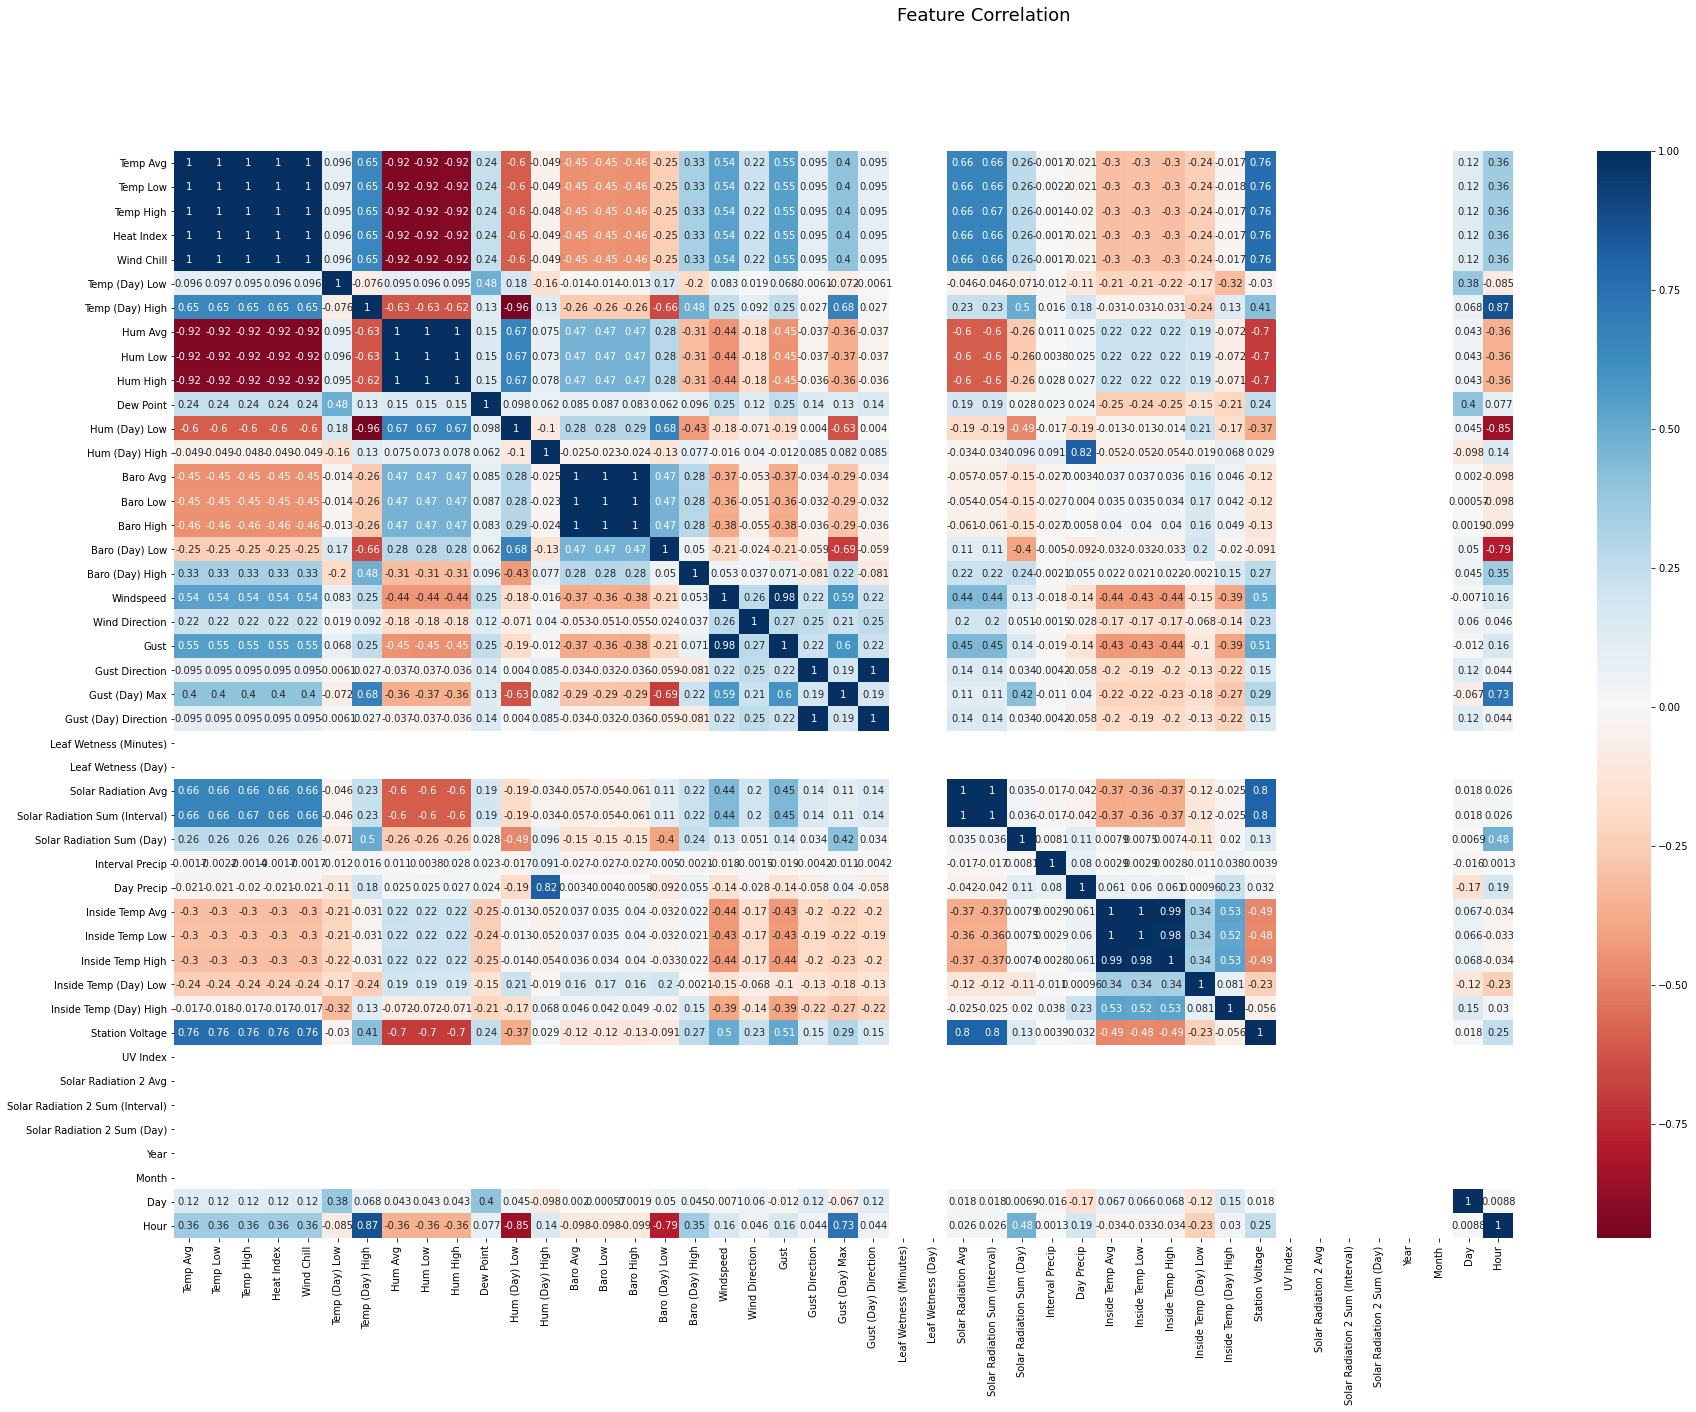

In [ ]:
fig = plt.figure(figsize=(30,20))
fig.suptitle('Feature Correlation', fontsize=18)
sns.heatmap(mydata.corr(), annot=True, cmap='RdBu', center=0)

In [ ]:
mydata.drop('Year', axis = 1, inplace=True)

In [ ]:
mydata.drop('Month', axis = 1, inplace=True)

In [ ]:
mydata.head()

,Temp Avg,Temp Low,Temp High,Heat Index,Wind Chill,Temp (Day) Low,Temp (Day) High,Hum Avg,Hum Low,Hum High,Dew Point,Hum (Day) Low,Hum (Day) High,Baro Avg,Baro Low,Baro High,Baro (Day) Low,Baro (Day) High,Windspeed,Wind Direction,Gust,Gust Direction,Gust (Day) Max,Gust (Day) Direction,Leaf Wetness (Minutes),Leaf Wetness (Day),Solar Radiation Avg,Solar Radiation Sum (Interval),Solar Radiation Sum (Day),Interval Precip,Day Precip,Inside Temp Avg,Inside Temp Low,Inside Temp High,Inside Temp (Day) Low,Inside Temp (Day) High,Station Voltage,UV Index,Solar Radiation 2 Avg,Solar Radiation 2 Sum (Interval),Solar Radiation 2 Sum (Day),Day,Hour
0,7.5,7.5,7.5,7.5,7.5,7.3,16.7,91,92,92,6.1,47,96,720.0,719.9,719.9,717.1,720.8,1.9,67,3.5,270,48.4,270,NaN,NaN,0,0,14989626,0.0,0.0,28.8,28.9,28.9,28.3,29.4,6.6,NaN,0,0,0,1,0
1,7.5,7.5,7.5,7.5,7.5,7.5,7.5,92,92,92,6.3,92,92,719.9,719.9,719.9,719.9,719.9,5.3,67,7.9,67,7.9,67,NaN,NaN,0,0,0,0.0,0.0,28.9,28.9,28.9,28.9,28.9,6.6,NaN,0,0,0,1,0
2,7.5,7.5,7.5,7.5,7.5,7.5,7.5,91,92,92,6.1,92,92,719.9,719.9,719.9,719.9,719.9,6.6,67,7.9,67,7.9,67,NaN,NaN,0,0,0,0.0,0.0,28.8,28.9,28.9,28.9,28.9,6.6,NaN,0,0,0,1,0
3,7.5,7.5,7.5,7.5,7.5,7.5,7.5,92,92,92,6.3,92,92,719.8,719.9,719.7,719.7,719.9,4.0,67,5.6,67,7.9,67,NaN,NaN,0,0,0,0.0,0.0,28.9,28.9,28.9,28.9,28.9,6.6,NaN,0,0,0,1,0
4,7.5,7.5,7.5,7.5,7.5,7.5,7.5,91,92,92,6.1,92,92,719.8,719.9,719.7,719.7,719.9,3.2,67,5.1,67,7.9,67,NaN,NaN,0,0,0,0.0,0.0,28.8,28.9,28.9,28.9,28.9,6.6,NaN,0,0,0,1,0


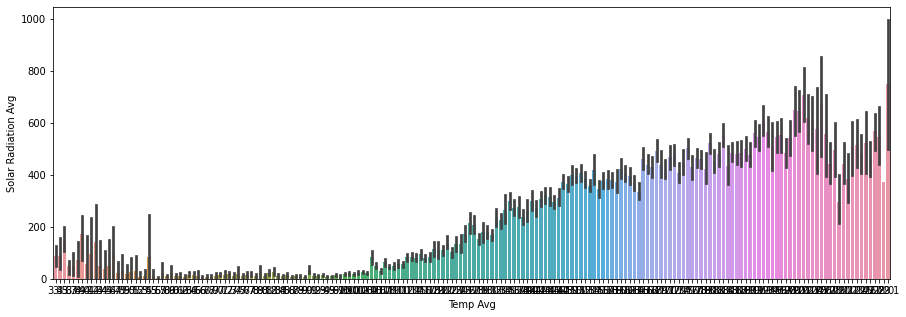

In [ ]:
import seaborn as sns

fig2 = plt.figure(figsize=(15,5))
sns.barplot(x=mydata['Temp Avg'],y=mydata['Solar Radiation Avg'])

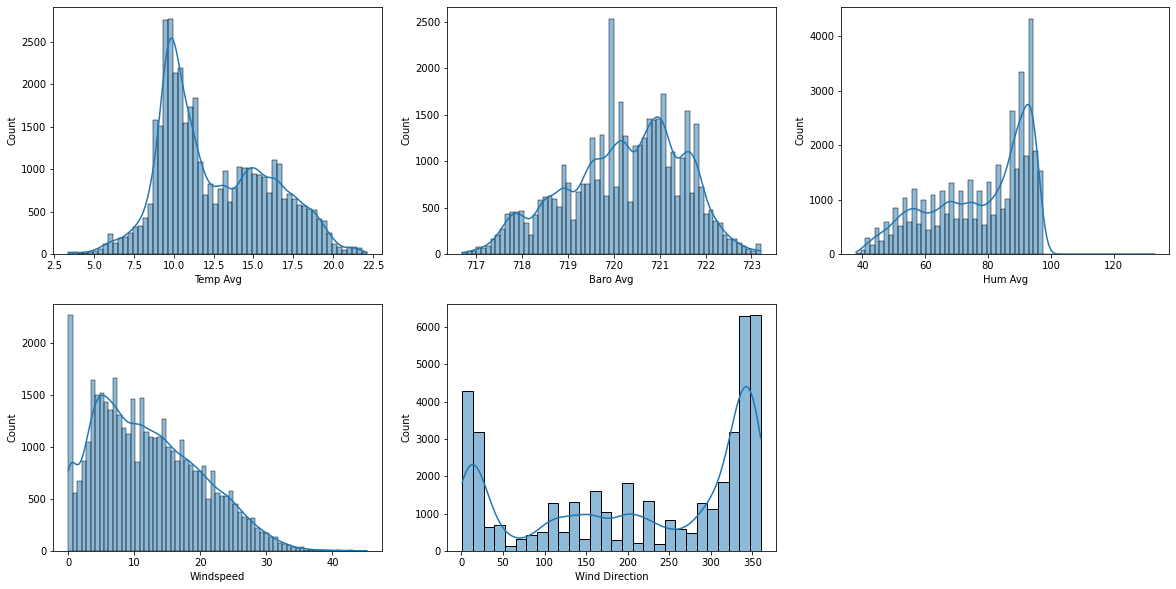

In [ ]:
plt.figure(figsize=(20,10))

distr = mydata[["Temp Avg","Baro Avg","Hum Avg","Windspeed", "Wind Direction"]]

for i, column in enumerate(distr):
    plt.subplot(2,3,i+1)
    sns.histplot(distr[column],kde=True)

In [ ]:
mydata_real = mydata[["Temp Avg","Baro Avg","Hum Avg","Windspeed","Solar Radiation Avg", "Hour","Day"]] 

In [ ]:
mydata1 = mydata_real.iloc[:,1:]
labels = mydata_real.iloc[:,0]

In [ ]:
sub = pd.DataFrame()
sub = sub.reset_index()
sub['Solar Radiation Avg'] = Target_predicted
sub.to_csv('submission.csv',index=False)

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(mydata1, labels, test_size = 0.2, random_state = 25)


In [ ]:
mae_list = []
mse_list = []
r2_list = []
var_list = []
max_list = []

In [ ]:
model1 = LinearRegression()
model1.fit(train_data, train_labels)
Pred1 = model1.predict(test_data)



In [ ]:
mae_list.append(mean_absolute_error(test_labels, Pred1))
mse_list.append(mean_squared_error(test_labels, Pred1))
r2_list.append(r2_score(test_labels, Pred1))
var_list.append(explained_variance_score(test_labels, Pred1))
max_list.append(max_error(test_labels, Pred1))

print('MAE : ', mean_absolute_error(test_labels, Pred1))
print('MSE : ', mean_squared_error(test_labels, Pred1))
print('R^2 : ', r2_score(test_labels, Pred1))
print('Var : ', explained_variance_score(test_labels, Pred1))
print('Max : ', max_error(test_labels, Pred1))

MAE :  0.8031326961091404
MSE :  1.1048371494460163
R^2 :  0.9067045766601866
Var :  0.9067047419471733
Max :  4.875942126919912


In [ ]:
mydata_real.head()

,Temp Avg,Baro Avg,Hum Avg,Windspeed,Solar Radiation Avg,Hour,Day
0,7.5,720.0,91,1.9,0,0,1
1,7.5,719.9,92,5.3,0,0,1
2,7.5,719.9,91,6.6,0,0,1
3,7.5,719.8,92,4.0,0,0,1
4,7.5,719.8,91,3.2,0,0,1


In [ ]:
mydata_real = mydata[["Temp Avg","Baro Avg","Hum Avg","Windspeed","Solar Radiation Avg", "Hour","Day"]] 

In [ ]:
df_check=mydata_real.isnull()
print(df_check)

       Temp Avg  Baro Avg  Hum Avg  ...  Solar Radiation Avg   Hour    Day
0         False     False    False  ...                False  False  False
1         False     False    False  ...                False  False  False
2         False     False    False  ...                False  False  False
3         False     False    False  ...                False  False  False
4         False     False    False  ...                False  False  False
...         ...       ...      ...  ...                  ...    ...    ...
41977     False     False    False  ...                False  False  False
41978     False     False    False  ...                False  False  False
41979     False     False    False  ...                False  False  False
41980     False     False    False  ...                False  False  False
41981     False     False    False  ...                False  False  False

[41982 rows x 7 columns]


In [ ]:
check_for_nan = mydata_real.isnull().values.any()
print(check_for_nan)

False


In [ ]:
X=mydata_real[["Temp Avg","Baro Avg","Hum Avg","Windspeed", "Hour","Day"]]
Y=mydata_real[["Solar Radiation Avg"]]
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 0)
def model_score_error(model):
    prepared_model=model.fit(X_train, Y_train)
    x=prepared_model.score(X_test,Y_test)
    print('Score: ',x)
    Target_predicted=prepared_model.predict(X_test) 
    MSE=mean_squared_error(Y_test,Target_predicted) 
    print('mean square error', MSE)

In [ ]:
Model2 = RandomForestRegressor(max_depth = None, n_estimators = 500, max_features='auto')
Model2.fit(train_data, train_labels)
Pred2 = Model2.predict(test_data)

In [ ]:
model_score_error(Model2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Score:  0.8825911935170769
mean square error 8455.049038026065


In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=4200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             nthread=-1)

In [ ]:
model_score_error(model_xgb)

Score:  0.8207190460872175
mean square error 12910.694711279099


In [ ]:
X = mydata_real[['Temp Avg', 'Baro Avg', 'Hum Avg', 'Windspeed']]
y = mydata_real['Solar Radiation Avg']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, y_train)
feature_importances = regressor.feature_importances_

In [ ]:
X_train_opt = X_train.copy()
removed_columns = pd.DataFrame()
models = []
r2s_opt = []

In [ ]:
for i in range(0, 5):
    regressor.fit(X_train_opt, y_train)
    feature_importances = regressor.feature_importances_
    accuracies = cross_val_score(estimator=regressor,
                                 X=X_train_opt,
                                 y=y_train, cv=5,
                                 scoring='r2')
    r2s_opt = np.append(r2s_opt, accuracies.mean())
    models = np.append(models, ", ".join(list(X_train_opt)))

In [ ]:
feature_selection = pd.DataFrame({'Features': models, 'r2 Score': r2s_opt})
feature_selection.head()

,Features,r2 Score
0,"Temp Avg, Baro Avg, Hum Avg, Windspeed",0.804456
1,"Temp Avg, Baro Avg, Hum Avg, Windspeed",0.803892
2,"Temp Avg, Baro Avg, Hum Avg, Windspeed",0.803567
3,"Temp Avg, Baro Avg, Hum Avg, Windspeed",0.803538
4,"Temp Avg, Baro Avg, Hum Avg, Windspeed",0.804093


In [ ]:
X_train_best = X_train[['Temp Avg', 'Baro Avg', 'Hum Avg', 'Windspeed']]
X_test_best = X_test[['Temp Avg', 'Baro Avg', 'Hum Avg', 'Windspeed']]
regressor.fit(X_train_best, y_train)
pickle.dump(regressor,open('Finalmodel.pkl','wb'))
model = pickle.load(open('Finalmodel.pkl','rb'))

In [ ]:
accuracies = cross_val_score(estimator = regressor, X = X_train_best,y = y_train, cv = 10, scoring = 'r2')
accuracy = accuracies.mean()
print('r2 = {}'.format(accuracy))

r2 = 0.8098311209201187


In [ ]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
y_pred = regressor.predict(X_test_best)
explained_variance_score = explained_variance_score(y_test, y_pred)
mean_squared_error = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('explained variance = {}'.format(explained_variance_score))
print('mse = {}'.format(mean_squared_error))
print('r2 = {}'.format(r_squared))
Date  = float(input("Enter date (DDMMYYYY): "))
Time  = float(input("Enter Time (HH:MM:SS):  "))
Temperature = float(input("Enter Temperature: "))
Pressure    = float(input("Enter Pressure: "))
Humidity    = float(input("Enter Humidity: "))
Speed       = float(input("Enter Speed : "))
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
y_pred = regressor.predict(X_test_best)
explained_variance_score = explained_variance_score(y_test, y_pred)
mean_squared_error = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('explained variance = {}'.format(explained_variance_score))
print('mse = {}'.format(mean_squared_error))
print('r2 = {}'.format(r_squared))
Date  = float(input("Enter date (DDMMYYYY): "))
Time  = float(input("Enter Time (HH:MM:SS):  "))
Temperature = float(input("Enter Temperature: "))
Pressure    = float(input("Enter Pressure: "))
Humidity    = float(input("Enter Humidity: "))
Speed       = float(input("Enter Speed : "))

explained variance = 0.8197349416583954
mse = 13160.020334672063
r2 = 0.8197337023614599
Enter date (DDMMYYYY): 01022020
Enter Time (HH:MM:SS):  103015
Enter Temperature: 9.6
Enter Pressure: 721.6
Enter Humidity: 9.6
Enter Speed : 315
explained variance = 0.8197349416583954
mse = 13160.020334672063
r2 = 0.8197337023614599
Enter date (DDMMYYYY): 01022020
Enter Time (HH:MM:SS):  103015
Enter Temperature: 9.6
Enter Pressure: 721.6
Enter Humidity: 9.6
Enter Speed : 315


In [ ]:
result = model.predict([[Temperature,Pressure, Humidity, Speed]])
print("The radiation caused in that day with specific day,time,temperture,Presure..etc",result)

The radiation caused in that day with specific day,time,temperture,Presure..etc [420.495]
